## Creando set de datos negativo 

###### NOT partial NOT putative NOT predicted NOT keyword:"Antimicrobial [KW-0929]" NOT keyword:antiviral NOT keyword:anticancer length:[5 TO 50] NOT keyword:"Antibiotic [KW-0044]" NOT keyword:"Fungicide [KW-0295]"
###### Unreviewed (TrEMBL) - Computationally analyzed: 355,215 (Uniprot_total.xlsx)
###### Reviewed (Swiss-Prot) - Manually annotated: 


Eliminamos secuencias con gaps para predicción estructural en PEP2D

In [1]:
import sys
from Bio import SeqIO

In [ ]:
# link = "./Data/negative/negative_nox.fasta"
# file = open(link, "w")
# with open('./Data/negative/negative_data.fasta') as handle:
#     for record in SeqIO.parse(handle, "fasta"):
#         if record.seq.count('X') == 0:
#             file.write(record.format("fasta"))
# file.close()

Data analisis after structural prediction

In [1]:
import pandas as pd
from collections import Counter
import re

In [102]:
negative_raw=pd.read_excel('./Data/negative/negative_data.xlsx')
negativeX=negative_raw[~negative_raw.sequence.str.contains('X')]
negative=negativeX.drop_duplicates(ignore_index=True, subset=['sequence'])
negative_ss_raw=pd.read_excel('./Data/negative/negative_ss.xlsx')
negative_ss=negative_ss_raw.drop_duplicates(ignore_index=True, subset=['sequence'])

In [103]:
print(negative_raw.shape, negative.shape, negativeX.shape)

(3438, 7) (2570, 7) (3282, 7)


In [108]:
negative_complete_r=pd.merge(negative, negative_ss, on='sequence', how='right')

In [109]:
negative_complete_r.shape

(2550, 12)

In [105]:
def drop_inusual_aa(df):
    filt_sec=[]
    sequence_list=df.sequence.tolist()
    for sequence in sequence_list:
        if re.search('[^LQRCPFDNWMVGSAEKHIYT]', sequence):
            filt_sec.append(sequence)
    test_df=df[~df.sequence.isin(filt_sec)].reset_index(drop=True)
    return test_df

In [111]:
negative_complete_r=drop_inusual_aa(negative_complete_r)
        

In [112]:
negative_complete_r.shape

(2547, 12)

In [99]:
positive_raw=pd.read_csv('./Data/grampa_pep2d.csv')

In [100]:
positive_r=positive_raw[positive_raw.len >= 5]

In [113]:
positive_r.shape

(5931, 7)

In [114]:
positive_r=drop_inusual_aa(positive_r)

In [115]:
positive_r.shape

(5931, 7)

Erasing shared sequences

In [116]:
shared=pd.merge(negative_complete_r, positive_r, on='sequence')

In [117]:
shared_sec=shared.sequence.tolist()

In [118]:
print(positive_r.shape, negative_complete_r.shape, shared.shape)

(5931, 7) (2547, 12) (36, 18)


In [119]:
positive=positive_r[~positive_r.sequence.isin(shared_sec)].reset_index(drop=True)
negative_complete=negative_complete_r[~negative_complete_r.sequence.isin(shared_sec)].reset_index(drop=True)

In [120]:
print(positive.shape, negative_complete.shape)

(5895, 7) (2511, 12)


In [198]:
# positive.to_excel("./Data/negative/test_bias/positive.xlsx")
# negative_complete.to_excel("./Data/negative/test_bias/negative.xlsx")

In [199]:
# link = "./Data/negative/test_bias/negative.fasta"
# file = open(link, "w")
# for i in range(len(negative_complete)):
#     file.write(">"  + negative_complete.entry_name[i] + "\n" + negative_complete.sequence[i] + "\n")

# file.close()

In [200]:
# link = "./Data/negative/test_bias/positive.fasta"
# file = open(link, "w")
# for i in range(len(positive)):
#     file.write(">"  + positive.id[i] + "\n" + positive.sequence[i] + "\n")

# file.close()

In [201]:
import plotly.express as px


fig = px.scatter_ternary(negative_complete, a='helix%', b='sheet%', c='coil%')

fig.update_traces(marker=dict(size=5),
                  selector=dict(mode='markers'))

def makeAxis(title, tickangle):
    return {
      'title': title,
      'titlefont': { 'size': 20 },
      'tickangle': tickangle,
      'tickfont': { 'size': 15 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
fig.update_layout(
{
    'ternary': {
        'sum': 100,
        'aaxis': makeAxis('Hélices', 0),
        'baxis': makeAxis('<br>Láminas', 45),
        'caxis': makeAxis('<br>Coils', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Composicion estructural set negativo',
        'x': 0.5,
        'y': 1.20,
        'font': { 'size': 20 }
    }]
}
        ) 
fig.show()

In [202]:
sub1_n=negative_complete[negative_complete['sheet%']>=20]
sub2_n=negative_complete[negative_complete['helix%']>=20]
sub3_n=negative_complete[negative_complete['coil%']>=20]

In [203]:
print(sub1_n.shape, sub2_n.shape, sub3_n.shape)

(895, 12) (882, 12) (2506, 12)


In [204]:
mix_n=sub1_n[(sub1_n.sequence.isin(sub2_n.sequence)) & (sub1_n.sequence.isin(sub3_n.sequence))].reset_index(drop=True)
betacoil_n=sub1_n[(~sub1_n.sequence.isin(sub2_n.sequence)) & (sub1_n.sequence.isin(sub3_n.sequence))].reset_index(drop=True)
alphacoil_n=sub2_n[(~sub2_n.sequence.isin(sub1_n.sequence)) & (sub2_n.sequence.isin(sub3_n.sequence))].reset_index(drop=True)
alphabeta_n=sub2_n[(~sub2_n.sequence.isin(sub3_n.sequence)) & (sub2_n.sequence.isin(sub1_n.sequence))].reset_index(drop=True)
allalpha_n=sub2_n[(~sub2_n.sequence.isin(sub1_n.sequence)) & (~sub2_n.sequence.isin(sub3_n.sequence))].reset_index(drop=True)
allbeta_n=sub1_n[(~sub1_n.sequence.isin(sub2_n.sequence)) & (~sub1_n.sequence.isin(sub3_n.sequence))].reset_index(drop=True)
allcoil_n=sub3_n[(~sub3_n.sequence.isin(sub1_n.sequence)) & (~sub3_n.sequence.isin(sub2_n.sequence))].reset_index(drop=True)

In [205]:
print('Total', negative_complete.shape[0])
print('All alpha structures:', allalpha_n.shape[0], 'helix ranges:', allalpha_n['helix%'].min(),'-',allalpha_n['helix%'].max())
print('All beta structures:', allbeta_n.shape[0])
print('All coil structures:', allcoil_n.shape[0])
print('Alpha-coil structures:', alphacoil_n.shape[0])
print('Beta-coil structures:', betacoil_n.shape[0],  'beta ranges:', betacoil_n['sheet%'].min(),'-',betacoil_n['sheet%'].max())
print('Alpha-beta structures:', alphabeta_n.shape[0])
print('Mixed structures:', mix_n.shape[0])

Total 2511
All alpha structures: 5 helix ranges: 80.43 - 86.11
All beta structures: 0
All coil structures: 862
Alpha-coil structures: 749
Beta-coil structures: 767 beta ranges: 20.0 - 62.07
Alpha-beta structures: 0
Mixed structures: 128


In [206]:
import plotly.express as px


fig = px.scatter_ternary(betacoil_n, a='helix%', b='sheet%', c='coil%')

fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))

def makeAxis(title, tickangle):
    return {
      'title': title,
      'titlefont': { 'size': 20 },
      'tickangle': tickangle,
      'tickfont': { 'size': 15 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
fig.update_layout(
{
    'ternary': {
        'sum': 100,
        'aaxis': makeAxis('Hélices', 0),
        'baxis': makeAxis('<br>Láminas', 45),
        'caxis': makeAxis('<br>Coils', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Composicion estructural set negativo',
        'x': 0.5,
        'y': 1.20,
        'font': { 'size': 20 }
    }]
}
        ) 
fig.show()

In [207]:
import plotly.express as px


fig = px.scatter_ternary(positive, a='helix%', b='sheet%', c='coil%')

fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))

def makeAxis(title, tickangle):
    return {
      'title': title,
      'titlefont': { 'size': 20 },
      'tickangle': tickangle,
      'tickfont': { 'size': 15 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
fig.update_layout(
{
    'ternary': {
        'sum': 100,
        'aaxis': makeAxis('Hélices', 0),
        'baxis': makeAxis('<br>Láminas', 45),
        'caxis': makeAxis('<br>Coils', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Composicion estructural set positivo',
        'x': 0.5,
        'y': 1.20,
        'font': { 'size': 20 }
    }]
}
        ) 
fig.show()

In [122]:
sub1=positive[positive['sheet%']>=20]
sub2=positive[positive['helix%']>=20]
sub3=positive[positive['coil%']>=20]

In [123]:
print(sub1.shape, sub2.shape, sub3.shape)

(914, 7) (4142, 7) (5807, 7)


In [124]:
mix=sub1[(sub1.sequence.isin(sub2.sequence)) & (sub1.sequence.isin(sub3.sequence))].reset_index(drop=True)
betacoil=sub1[(~sub1.sequence.isin(sub2.sequence)) & (sub1.sequence.isin(sub3.sequence))].reset_index(drop=True)
alphacoil=sub2[(~sub2.sequence.isin(sub1.sequence)) & (sub2.sequence.isin(sub3.sequence))].reset_index(drop=True)
alphabeta=sub2[(~sub2.sequence.isin(sub3.sequence)) & (sub2.sequence.isin(sub1.sequence))].reset_index(drop=True)
allalpha=sub2[(~sub2.sequence.isin(sub1.sequence)) & (~sub2.sequence.isin(sub3.sequence))].reset_index(drop=True)
allbeta=sub1[(~sub1.sequence.isin(sub2.sequence)) & (~sub1.sequence.isin(sub3.sequence))].reset_index(drop=True)
allcoil=sub3[(~sub3.sequence.isin(sub1.sequence)) & (~sub3.sequence.isin(sub2.sequence))].reset_index(drop=True)


In [211]:
print('Total:', positive.shape[0])
print('All alpha structures:', allalpha.shape[0], 'helix ranges:', allalpha['helix%'].min(),'-',allalpha['helix%'].max())
print('All beta structures:', allbeta.shape[0])
print('All coil structures:', allcoil.shape[0])
print('Alpha-coil structures:', alphacoil.shape[0])
print('Beta-coil structures:', betacoil.shape[0])
print('Alpha-beta structures:', alphabeta.shape[0])
print('Mixed structures:', mix.shape[0])

Total: 5895
All alpha structures: 87 helix ranges: 70.27 - 90.0
All beta structures: 1
All coil structures: 1021
Alpha-coil structures: 3873
Beta-coil structures: 731
Alpha-beta structures: 0
Mixed structures: 182


In [ ]:
# link = "./Data/negative/betacoil.fasta"
# file = open(link, "w")
# for i in range(len(betacoil)):
#     file.write(">"  + betacoil.id[i] + "\n" + betacoil.sequence[i] + "\n")
    
# file.close()

In [ ]:
# link = "./Data/negative/alphacoil.fasta"
# file = open(link, "w")
# for i in range(len(alphacoil)):
#     file.write(">"  + alphacoil.id[i] + "\n" + alphacoil.sequence[i] + "\n")
    
# file.close()

In [ ]:
# link = "./Data/negative/allcoil.fasta"
# file = open(link, "w")
# for i in range(len(allcoil)):
#     file.write(">"  + allcoil.id[i] + "\n" + allcoil.sequence[i] + "\n")
    
# file.close()

In [ ]:
# link = "./Data/negative/mix.fasta"
# file = open(link, "w")
# for i in range(len(mix)):
#     file.write(">"  + mix.id[i] + "\n" + mix.sequence[i] + "\n")
    
# file.close()

In [ ]:
# link = "./Data/negative/betacoil_n.fasta"
# file = open(link, "w")
# for i in range(len(betacoil_n)):
#     file.write(">"  + betacoil_n.entry_name[i] + "\n" + betacoil_n.sequence[i] + "\n")
    
# file.close()

In [ ]:
# link = "./Data/negative/alphacoil_n.fasta"
# file = open(link, "w")
# for i in range(len(alphacoil_n)):
#     file.write(">"  + alphacoil_n.entry_name[i] + "\n" + alphacoil_n.sequence[i] + "\n")

# file.close()

In [ ]:
# link = "./Data/negative/allcoil_n.fasta"
# file = open(link, "w")
# for i in range(len(allcoil_n)):
#     file.write(">"  + allcoil_n.entry_name[i] + "\n" + allcoil_n.sequence[i] + "\n")

# file.close()

In [ ]:
# link = "./Data/negative/mix_n.fasta"
# file = open(link, "w")
# for i in range(len(mix_n)):
#     file.write(">"  + mix_n.entry_name[i] + "\n" + mix_n.sequence[i] + "\n")

# file.close()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [8]:
allcoil_all=pd.read_excel("./Data/negative/test_bias/allmodels/allcoil_allnew.xlsx")
betacoil_all=pd.read_excel("./Data/negative/test_bias/allmodels/betacoil_allnew.xlsx")
alphacoil_all=pd.read_excel("./Data/negative/test_bias/allmodels/alphacoil_allnew.xlsx")
mix_all=pd.read_excel("./Data/negative/test_bias/allmodels/mix_allnew.xlsx")

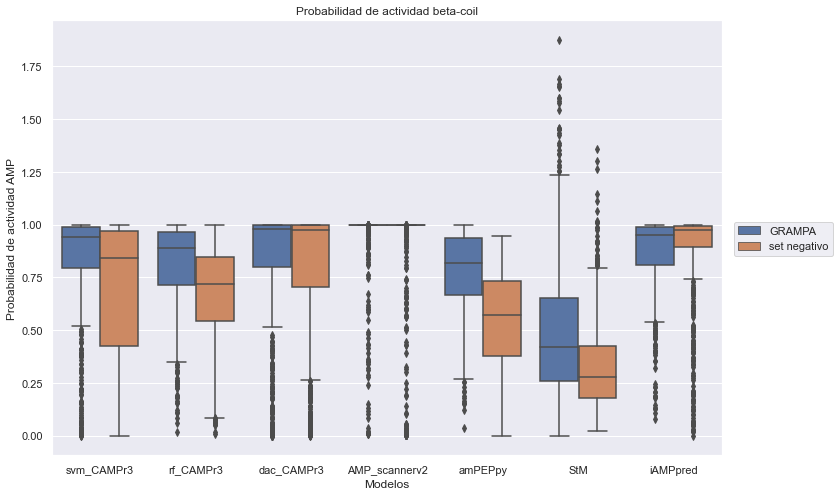

In [9]:
betacoil_all_plt = betacoil_all.dropna()
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(data=betacoil_all_plt, x='model',y='prob', hue='type')
ax.legend(handles=ax.legend_.legendHandles, labels=['GRAMPA', 'set negativo'], bbox_to_anchor=(1.01, 0.55))
plt.xlabel('Modelos')
plt.ylabel('Probabilidad de actividad AMP')
plt.title('Probabilidad de actividad beta-coil')
plt.show()

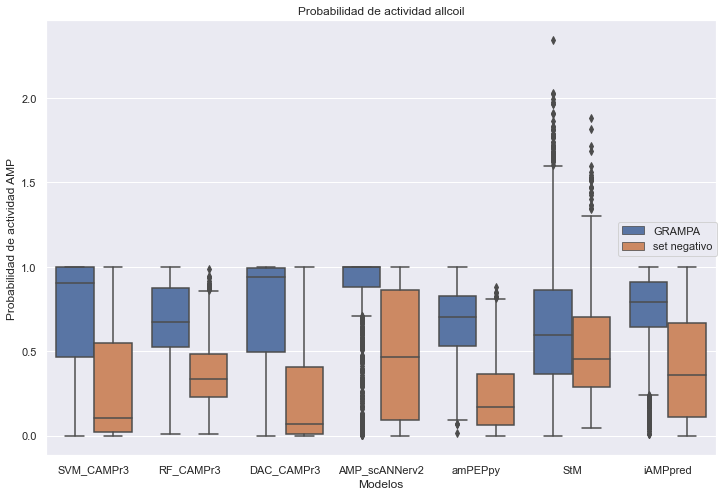

In [10]:
allcoil_all_plt=allcoil_all.dropna()
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(data=allcoil_all_plt, x='model',y='prob', hue='type')
ax.legend(handles=ax.legend_.legendHandles, labels=['GRAMPA', 'set negativo'], bbox_to_anchor=(1.01, 0.55))
plt.xlabel('Modelos')
plt.ylabel('Probabilidad de actividad AMP')
plt.title('Probabilidad de actividad allcoil')
plt.show()

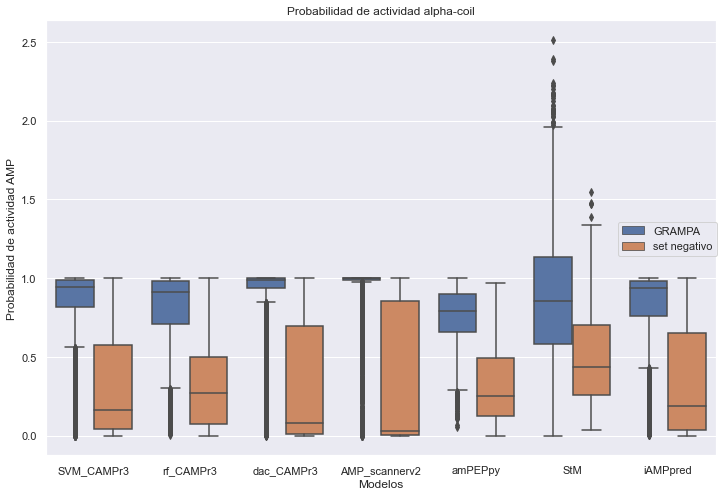

In [11]:
alphacoil_all_plt=alphacoil_all.dropna()
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(data=alphacoil_all_plt, x='model',y='prob', hue='type')
ax.legend(handles=ax.legend_.legendHandles, labels=['GRAMPA', 'set negativo'], bbox_to_anchor=(1.01, 0.55))
plt.xlabel('Modelos')
plt.ylabel('Probabilidad de actividad AMP')
plt.title('Probabilidad de actividad alpha-coil')
plt.show()

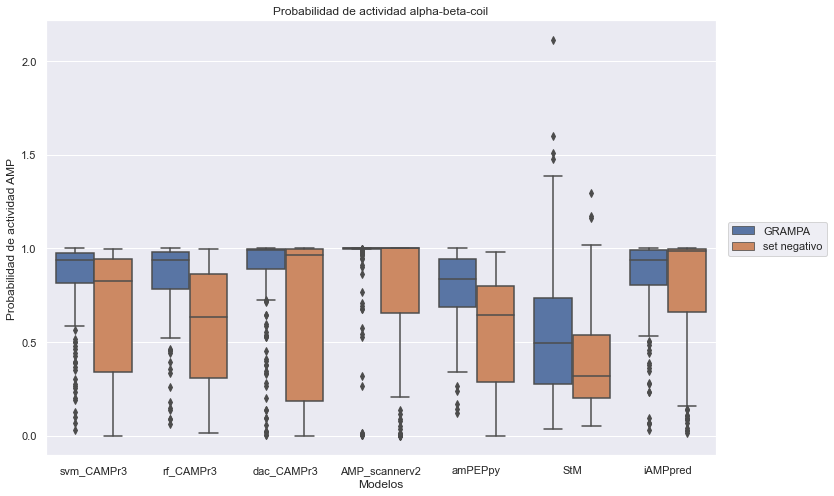

In [12]:
mix_all_plt=mix_all.dropna()
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(data=mix_all_plt, x='model',y='prob', hue='type')
ax.legend(handles=ax.legend_.legendHandles, labels=['GRAMPA', 'set negativo'], bbox_to_anchor=(1.01, 0.55))
plt.xlabel('Modelos')
plt.ylabel('Probabilidad de actividad AMP')
plt.title('Probabilidad de actividad alpha-beta-coil')
plt.show()

In [13]:
def conf_mat(df, model):
    fn=int(len(df[(df.model==model) & (df['class']=='NAMP') & (df['type']=='positive')]))
    fp=int(len(df[(df.model==model) & (df['class']=='AMP') & (df['type']=='negative')]))
    tn=int(len(df[(df.model==model) & (df['class']=='NAMP') & (df['type']=='negative')]))
    tp=int(len(df[(df.model==model) & (df['class']=='AMP') & (df['type']=='positive')]))
    confmat=[[tp,fn],[fp, tn]]
    
    return confmat

In [14]:
def conf_df(df):
    confdf=pd.DataFrame()
    i=0
    while i < len(df.model.unique()):   
        for model in df.model.unique():
            positive_len=len(df[(df.model==model) & (df.type == 'positive')])
            negative_len=len(df[(df.model==model) & (df.type == 'negative')])
            fn=int(len(df[(df.model==model) & (df['class']=='NAMP') & (df['type']=='positive')]))
            fp=int(len(df[(df.model==model) & (df['class']=='AMP') & (df['type']=='negative')]))
            tn=int(len(df[(df.model==model) & (df['class']=='NAMP') & (df['type']=='negative')]))
            tp=int(len(df[(df.model==model) & (df['class']=='AMP') & (df['type']=='positive')]))
            pre=tp/(tp+fp)
            acc=(tp+tn)/(tp+tn+fp+fn)
            spec=tn/(tn+fp)
            sens=tp/(tp+fn)
            d={'count':[tp,tn,fp,fn],
                'label':['True Positive','True Negative','False Negative', 'False Positive'],
                'model':[model]*4, 
                'ratio':[(tp/positive_len),(tn/negative_len),(fp/negative_len),(fn/positive_len)],
                'metric':['Presicion','Accuracy','Specificity','Sensitivity'],
                'value':[acc,pre,sens,spec]}
            confdf_model=pd.DataFrame(data=d)
            confdf=confdf.append(confdf_model)
            i+=1
    
    return confdf

In [15]:
allcoil_svm_confmat=conf_mat(df=allcoil_all, model='SVM')
allcoil_rf_confmat=conf_mat(df=allcoil_all, model='RF')
allcoil_dac_confmat=conf_mat(df=allcoil_all, model='DAC')
allcoil_ann_confmat=conf_mat(df=allcoil_all, model='ANN')
allcoil_ampeppy_confmat=conf_mat(df=allcoil_all, model='amPEPpy')

In [16]:
alphacoil_svm_confmat=conf_mat(df=alphacoil_all, model='SVM')
alphacoil_rf_confmat=conf_mat(df=alphacoil_all, model='RF')
alphacoil_dac_confmat=conf_mat(df=alphacoil_all, model='DAC')
alphacoil_ann_confmat=conf_mat(df=alphacoil_all, model='ANN')
alphacoil_ampeppy_confmat=conf_mat(df=alphacoil_all, model='amPEPpy')

In [17]:
betacoil_svm_confmat=conf_mat(df=betacoil_all, model='SVM')
betacoil_rf_confmat=conf_mat(df=betacoil_all, model='RF')
betacoil_dac_confmat=conf_mat(df=betacoil_all, model='DAC')
betacoil_ann_confmat=conf_mat(df=betacoil_all, model='ANN')
betacoil_ampeppy_confmat=conf_mat(df=betacoil_all, model='amPEPpy')

In [18]:
mix_svm_confmat=conf_mat(df=mix_all, model='SVM')
mix_rf_confmat=conf_mat(df=mix_all, model='RF')
mix_dac_confmat=conf_mat(df=mix_all, model='DAC')
mix_ann_confmat=conf_mat(df=mix_all, model='ANN')
mix_ampeppy_confmat=conf_mat(df=mix_all, model='amPEPpy')

In [19]:
allcoil_df=conf_df(allcoil_all)
alphacoil_df=conf_df(alphacoil_all)
betacoil_df=conf_df(betacoil_all)
mix_df=conf_df(mix_all)

In [21]:
allcoil_df.head()

,count,label,model,ratio,metric,value
0,755,True Positive,SVM_CAMPr3,0.739471,Presicion,0.738715
1,636,True Negative,SVM_CAMPr3,0.737819,Accuracy,0.769623
2,226,False Negative,SVM_CAMPr3,0.262181,Specificity,0.739471
3,266,False Positive,SVM_CAMPr3,0.260529,Sensitivity,0.737819
0,795,True Positive,RF_CAMPr3,0.778648,Presicion,0.775890


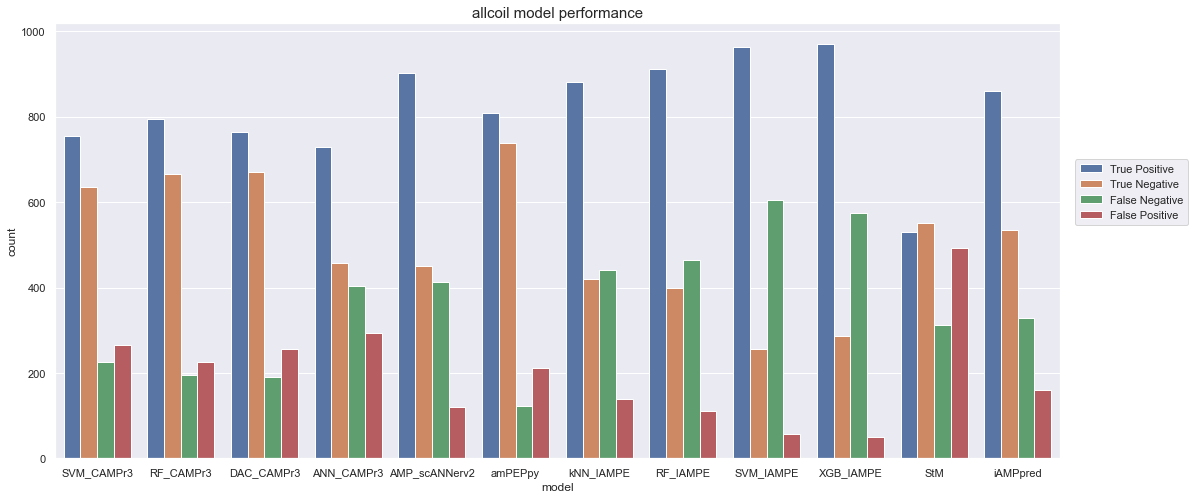

In [22]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=allcoil_df, x='model', y='count', hue='label')
ax.legend(handles=ax.legend_.legendHandles, labels=['True Positive','True Negative','False Negative', 'False Positive'], bbox_to_anchor=(1.01, 0.7))
ax.set_title('allcoil model performance', size=15)
plt.show()


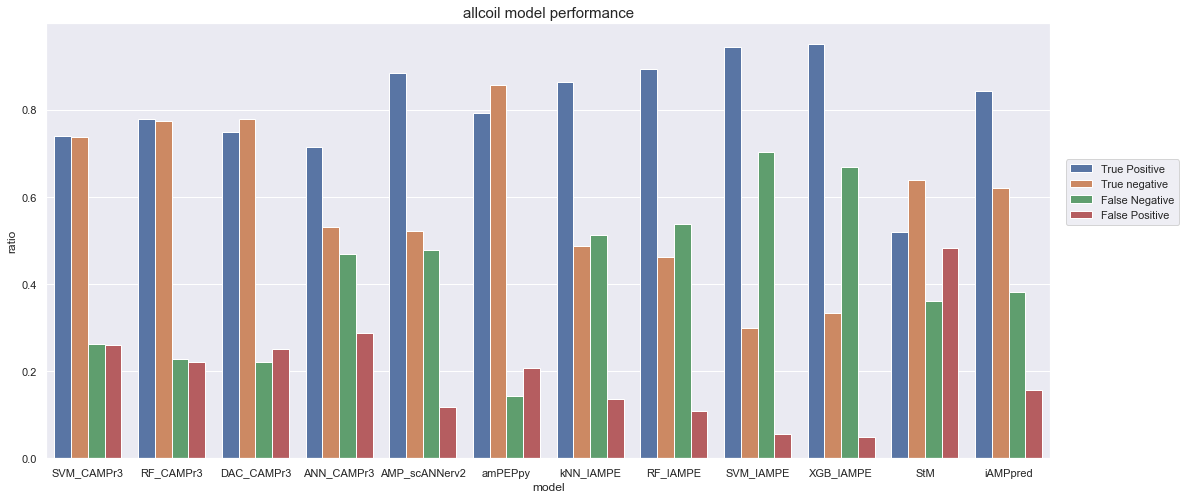

In [61]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=allcoil_df, x='model', y='ratio', hue='label')
ax.legend(handles=ax.legend_.legendHandles, labels=['True Positive','True negative','False Negative', 'False Positive'], bbox_to_anchor=(1.01, 0.7))
ax.set_title('allcoil model performance', size=15)
plt.show()

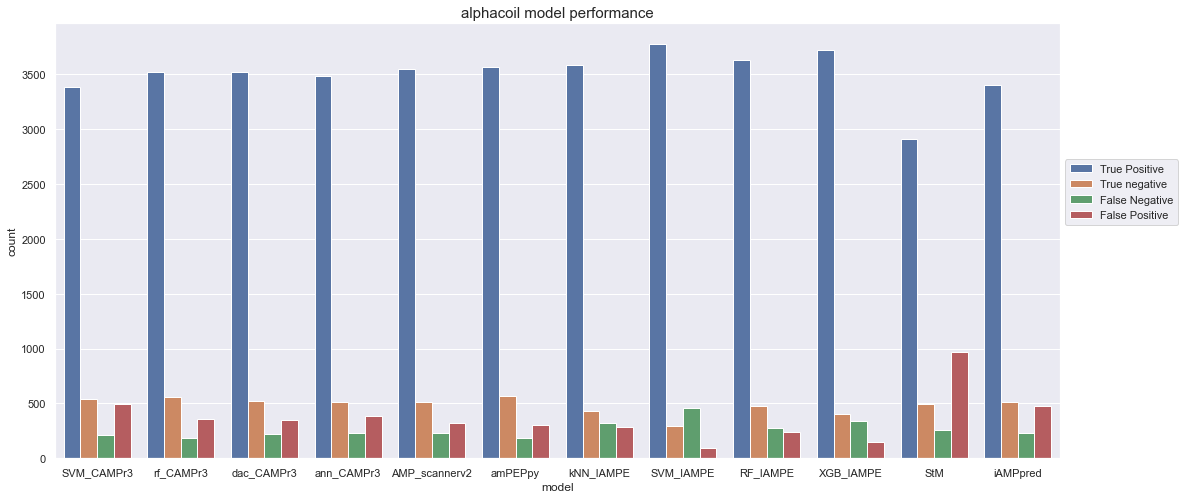

In [23]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=alphacoil_df, x='model', y='count', hue='label')
ax.legend(handles=ax.legend_.legendHandles, labels=['True Positive','True negative','False Negative', 'False Positive'], bbox_to_anchor=(1.00, 0.7))
ax.set_title('alphacoil model performance', size=15)
plt.show()

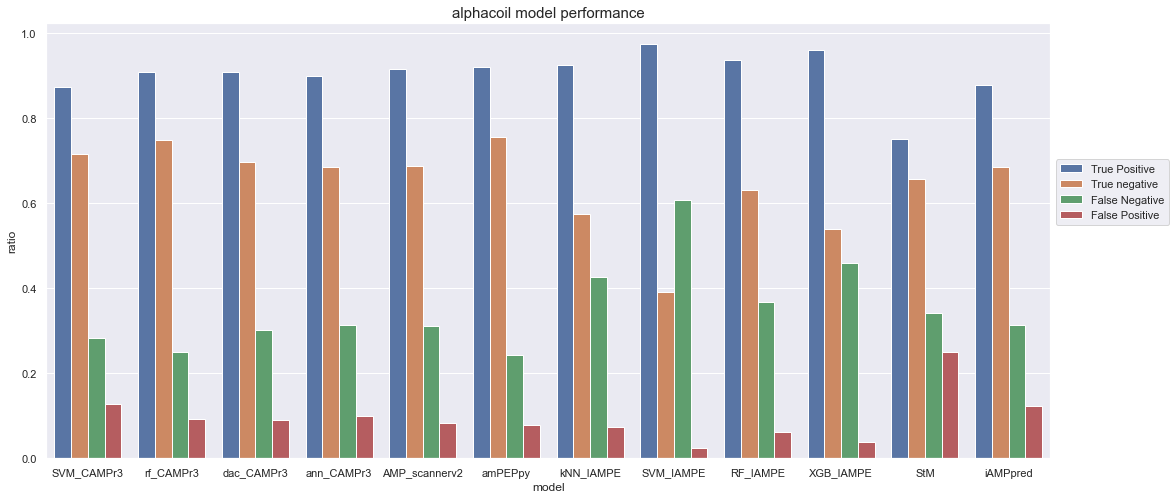

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=alphacoil_df, x='model', y='ratio', hue='label')
ax.legend(handles=ax.legend_.legendHandles, labels=['True Positive','True negative','False Negative', 'False Positive'], bbox_to_anchor=(1.00, 0.7))
ax.set_title('alphacoil model performance', size=15)
plt.show()

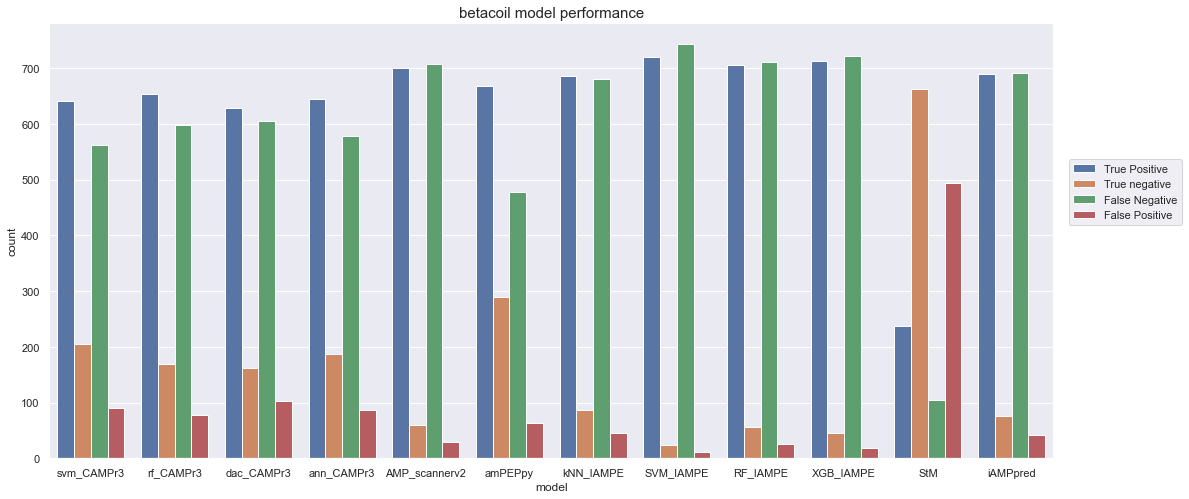

In [26]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=betacoil_df, x='model', y='count', hue='label')
ax.legend(handles=ax.legend_.legendHandles, labels=['True Positive','True negative','False Negative', 'False Positive'], bbox_to_anchor=(1.01, 0.7))
ax.set_title('betacoil model performance', size=15)
plt.show()

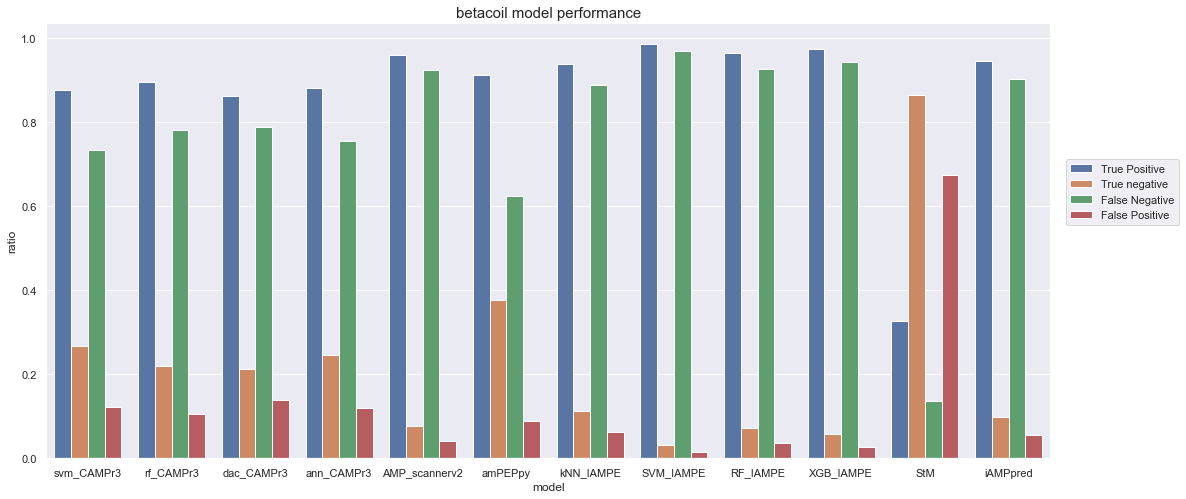

In [59]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=betacoil_df, x='model', y='ratio', hue='label')
ax.legend(handles=ax.legend_.legendHandles, labels=['True Positive','True negative','False Negative', 'False Positive'], bbox_to_anchor=(1.01, 0.7))
ax.set_title('betacoil model performance', size=15)
plt.show()

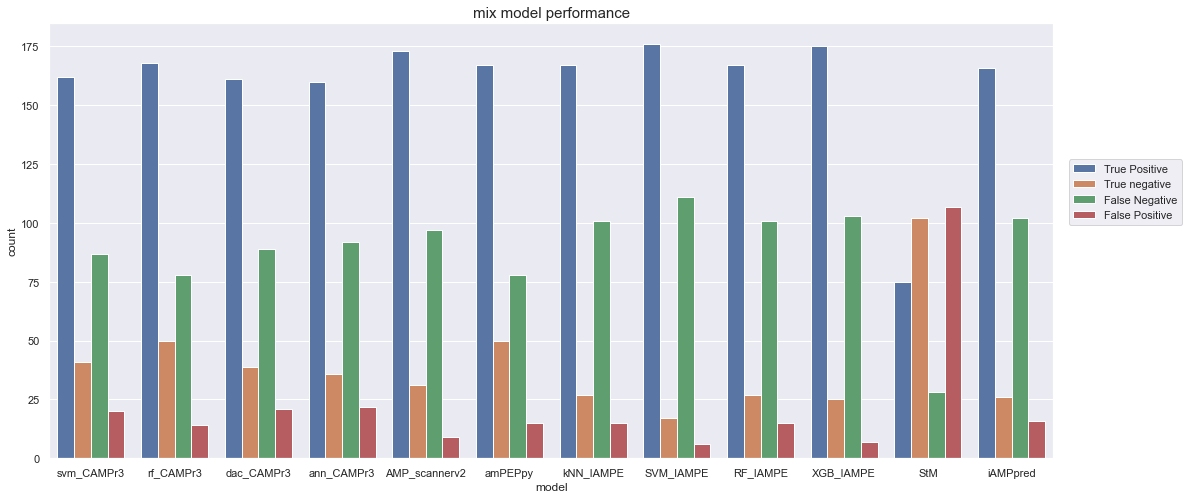

In [25]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=mix_df, x='model', y='count', hue='label')
ax.legend(handles=ax.legend_.legendHandles, labels=['True Positive','True negative','False Negative', 'False Positive'], bbox_to_anchor=(1.01, 0.7))
ax.set_title('mix model performance', size=15)
plt.show()

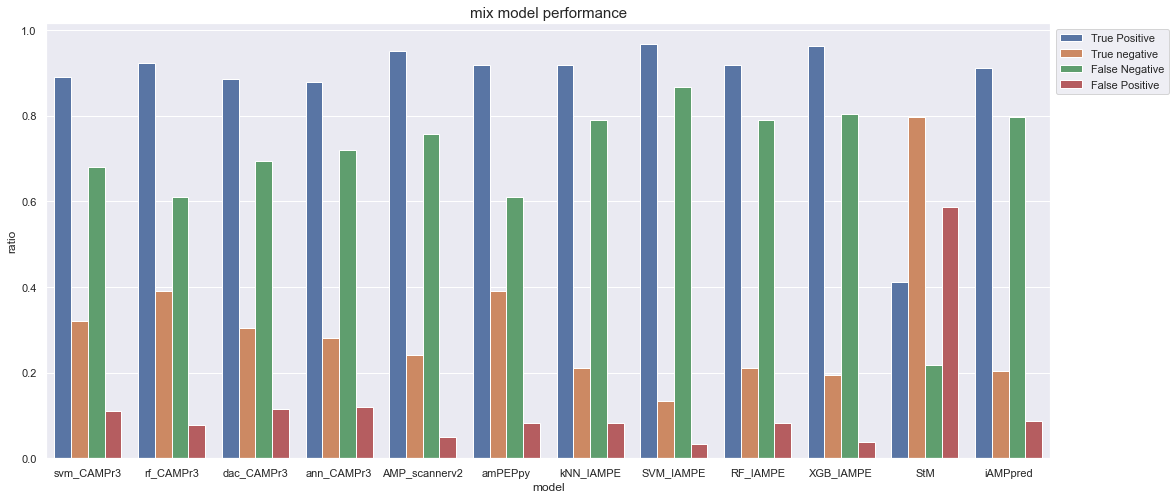

In [77]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=mix_df, x='model', y='ratio', hue='label')
ax.legend(handles=ax.legend_.legendHandles, labels=['True Positive','True negative','False Negative', 'False Positive'], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('mix model performance', size=15)
plt.show()

In [111]:
allcoil_df.head()

,count,label,model,ratio,metric,value
0,755,True Positive,SVM_CAMPr3,0.739471,Presicion,0.738715
1,636,True Negative,SVM_CAMPr3,0.737819,Accuracy,0.769623
2,226,False Negative,SVM_CAMPr3,0.262181,Specificity,0.739471
3,266,False Positive,SVM_CAMPr3,0.260529,Sensitivity,0.737819
0,795,True Positive,RF_CAMPr3,0.778648,Presicion,0.775890


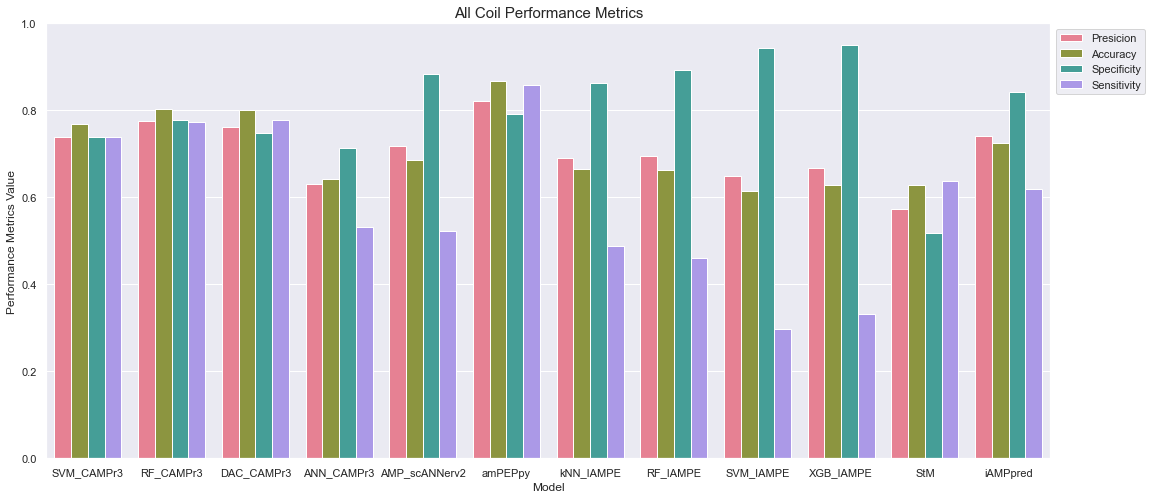

In [112]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=allcoil_df, x='model', y='value', hue='metric',palette="husl")
ax.legend(handles=ax.legend_.legendHandles, labels=['Presicion','Accuracy','Specificity','Sensitivity'], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('All Coil Performance Metrics', size=15)
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metrics Value')
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])

plt.show()

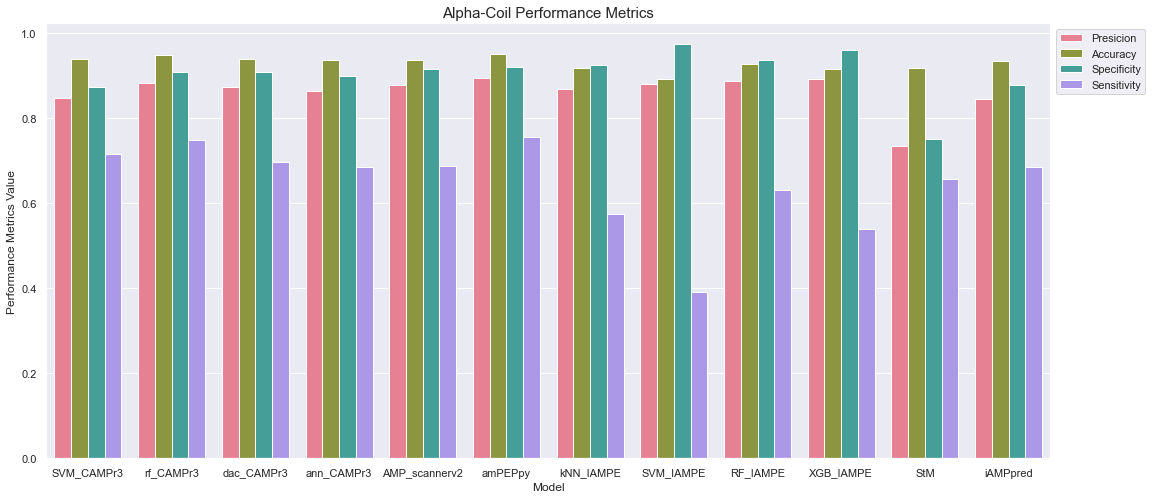

In [113]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=alphacoil_df, x='model', y='value', hue='metric',palette="husl")
ax.legend(handles=ax.legend_.legendHandles, labels=['Presicion','Accuracy','Specificity','Sensitivity'], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('Alpha-Coil Performance Metrics', size=15)
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metrics Value')


plt.show()

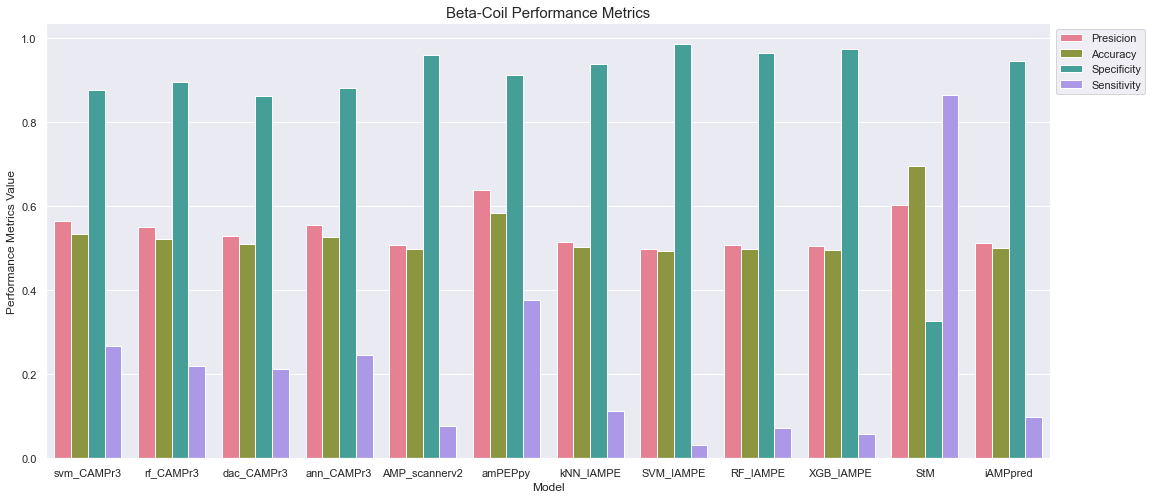

In [114]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=betacoil_df, x='model', y='value', hue='metric',palette="husl")
ax.legend(handles=ax.legend_.legendHandles, labels=['Presicion','Accuracy','Specificity','Sensitivity'], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('Beta-Coil Performance Metrics', size=15)
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metrics Value')

plt.show()

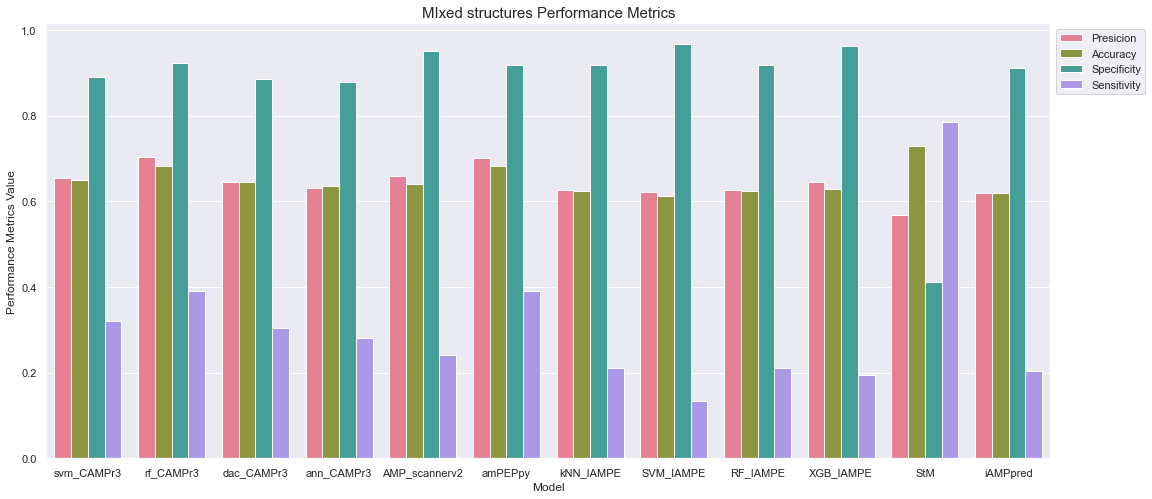

In [115]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.barplot(data=mix_df, x='model', y='value', hue='metric',palette="husl")
ax.legend(handles=ax.legend_.legendHandles, labels=['Presicion','Accuracy','Specificity','Sensitivity'], bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('MIxed structures Performance Metrics', size=15)
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metrics Value')

plt.show()